# Business Problem
As a marketing agency, our primary objective is to maximize the return on investment (ROI) for our clients' advertising campaigns. We have conducted two ad campaigns, one on Facebook and the other on AdWords, and we need to determine which platform yields better results in terms of clicks, conversions, and overall cost-effectiveness. By identifying the most effective platform, we can allocate our resources more efficiently and optimize our advertising strategies to deliver better outcomes for our clients.

# Research Question
#Which ad platform is more effective in terms of conversions, clicks, and overall cost-effectiveness?
-for this We calculate three key performance metrics -
 Click-Through Rate (CTR),Conversion Rate, & Cost per Click (CPC)

In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [31]:
#loading the dataset
df = pd.read_csv(r"C:\Users\DELL\Downloads\Projects- All Piyush\Projects - Python\Dataset\ABmarketing_campaign.csv")

In [32]:
# data overview
df.head()

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
0,1/1/2019,FB_Jan19,2116,18,8,$126,0.83%,42.73%,$7.14,AW_Jan19,4984,59,5,$194,1.18%,8.40%,$3.30
1,1/2/2019,FB_Jan19,3106,36,12,$104,1.15%,34.04%,$2.91,AW_Jan19,4022,71,6,$75,1.77%,7.80%,$1.05
2,1/3/2019,FB_Jan19,3105,26,8,$102,0.84%,31.45%,$3.89,AW_Jan19,3863,44,4,$141,1.13%,9.59%,$3.23
3,1/4/2019,FB_Jan19,1107,27,9,$71,2.45%,34.76%,$2.62,AW_Jan19,3911,49,5,$141,1.26%,11.08%,$2.86
4,1/5/2019,FB_Jan19,1317,15,7,$78,1.10%,47.59%,$5.38,AW_Jan19,4070,55,7,$133,1.36%,12.22%,$2.40


In [33]:
#rows and columns count of the dataset
df.shape

(365, 17)

In [34]:
#datatypes of the colums
df.dtypes

Date                                               object
Facebook Ad Campaign                               object
Facebook Ad Views                                   int64
Facebook Ad Clicks                                  int64
Facebook Ad Conversions                             int64
Cost per Facebook Ad                               object
Facebook Click-Through Rate (Clicks / View)        object
Facebook Conversion Rate (Conversions / Clicks)    object
Facebook Cost per Click (Ad Cost / Clicks)         object
AdWords Ad Campaign                                object
AdWords Ad Views                                    int64
AdWords Ad Clicks                                   int64
AdWords Ad Conversions                              int64
Cost per AdWords Ad                                object
AdWords Click-Through Rate (Clicks / View)         object
AdWords Conversion Rate (Conversions / Click)      object
AdWords Cost per Click (Ad Cost / Clicks)          object
dtype: object

In [35]:
#converting date to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [36]:
# descriptive stats of the campaigns
df.describe()

,Date,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions
count,365,365.000000,365.000000,365.000000,365.00000,365.000000,365.000000
mean,2019-07-02 00:00:00,2179.687671,44.049315,11.742466,4717.19726,60.383562,5.980822
min,2019-01-01 00:00:00,1050.000000,15.000000,5.000000,3714.00000,31.000000,3.000000
25%,2019-04-02 00:00:00,1656.000000,35.000000,10.000000,4247.00000,49.000000,5.000000
50%,2019-07-02 00:00:00,2202.000000,43.000000,12.000000,4711.00000,60.000000,6.000000
75%,2019-10-01 00:00:00,2717.000000,54.000000,13.000000,5190.00000,73.000000,7.000000
max,2019-12-31 00:00:00,3320.000000,73.000000,19.000000,5760.00000,89.000000,9.000000
std,NaN,618.074639,12.140559,2.924786,561.11406,14.368225,1.628106


In [37]:
df.dtypes

Date                                               datetime64[ns]
Facebook Ad Campaign                                       object
Facebook Ad Views                                           int64
Facebook Ad Clicks                                          int64
Facebook Ad Conversions                                     int64
Cost per Facebook Ad                                       object
Facebook Click-Through Rate (Clicks / View)                object
Facebook Conversion Rate (Conversions / Clicks)            object
Facebook Cost per Click (Ad Cost / Clicks)                 object
AdWords Ad Campaign                                        object
AdWords Ad Views                                            int64
AdWords Ad Clicks                                           int64
AdWords Ad Conversions                                      int64
Cost per AdWords Ad                                        object
AdWords Click-Through Rate (Clicks / View)                 object
AdWords Co

# Comparing Campaigns performance

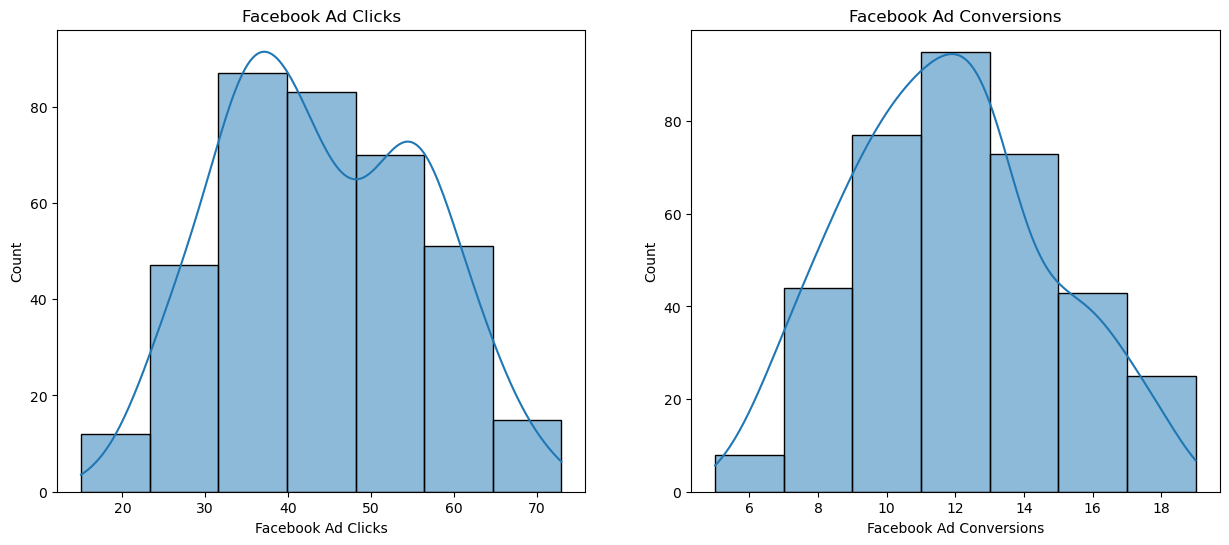

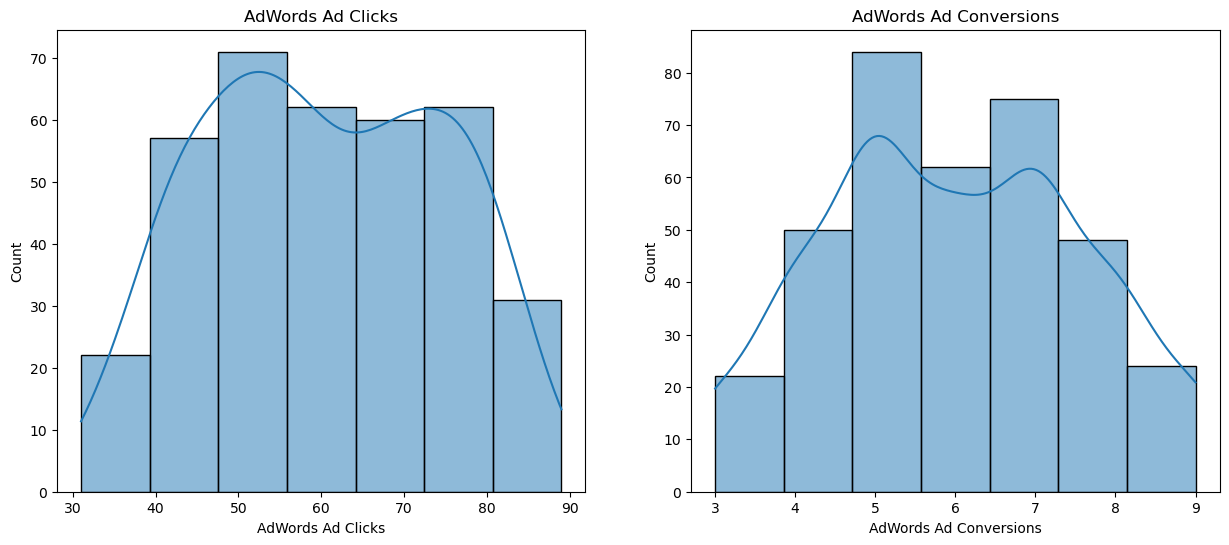

In [38]:
#distribution of the clicks and conversion
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title("Facebook Ad Clicks")
sns.histplot(df["Facebook Ad Clicks"],bins = 7 , edgecolor = 'k', kde = True)
plt.subplot(1,2,2)
plt.title("Facebook Ad Conversions")
sns.histplot(df["Facebook Ad Conversions"],bins = 7 , edgecolor = 'k', kde = True)
plt.show()  

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title("AdWords Ad Clicks")
sns.histplot(df["AdWords Ad Clicks"],bins = 7 , edgecolor = 'k', kde = True)
plt.subplot(1,2,2)
plt.title("AdWords Ad Conversions")
sns.histplot(df["AdWords Ad Conversions"],bins = 7 , edgecolor = 'k', kde = True)
plt.show()  


#All the histogram are showing some what symmetrical shape. This symmetrical shape suggests that the number of clicks and conversions is relatively evenly distributed. In other words, there are not many clicks or conversions that are outliers on either the high or low end.

#How frequently do we observe days with high numbers of conversions compared to days with low numbers of conversions?

In [39]:
# creating function to calculate the category for the conversion
def create_category(conversion_col):
    category = []
    for conversion in df[conversion_col]:
        if conversion < 6:
            category.append('less than 6')
        elif 6 <= conversion < 11:
            category.append('6-10')
        elif 11 <= conversion < 16:
            category.append('10-15')
        else:
            category.append('more than 15')
    return category

# applying function of different campaign's conversions
df['Facebook Conversion Category'] = create_category('Facebook Ad Conversions')
df['AdWords Conversion Category'] = create_category('AdWords Ad Conversions')
        

In [40]:
df[['Facebook Ad Conversions','Facebook Conversion Category','AdWords Ad Conversions','AdWords Ad Conversions']].head()

,Facebook Ad Conversions,Facebook Conversion Category,AdWords Ad Conversions,AdWords Ad Conversions
0,8,6-10,5,5
1,12,10-15,6,6
2,8,6-10,4,4
3,9,6-10,5,5
4,7,6-10,7,7


In [41]:
df['Facebook Conversion Category'].value_counts()

Facebook Conversion Category
10-15           189
6-10            128
more than 15     47
less than 6       1
Name: count, dtype: int64

In [42]:
facebook = pd.DataFrame(df['Facebook Conversion Category'].value_counts()).reset_index().rename(columns = {'Facebook Conversion Category':'Category'})
facebook

,Category,count
0,10-15,189
1,6-10,128
2,more than 15,47
3,less than 6,1


In [43]:
df['AdWords Conversion Category'].value_counts()

AdWords Conversion Category
6-10           209
less than 6    156
Name: count, dtype: int64

In [44]:
adwords = pd.DataFrame(df['AdWords Conversion Category'].value_counts()).reset_index().rename(columns = {'AdWords Conversion Category':'Category'})
adwords

,Category,count
0,6-10,209
1,less than 6,156


In [45]:

category_df = pd.merge(facebook, adwords, on = 'Category', how = 'outer').fillna(0)
category_df

,Category,count_x,count_y
0,10-15,189,0.0
1,6-10,128,209.0
2,less than 6,1,156.0
3,more than 15,47,0.0


In [47]:
category_df = category_df.iloc[[2,1,0,3]]
category_df

,Category,count_x,count_y
0,10-15,189,0.0
1,6-10,128,209.0
2,less than 6,1,156.0
3,more than 15,47,0.0


In [48]:
X_axis = np.arange(len(category_df))
X_axis

array([0, 1, 2, 3])

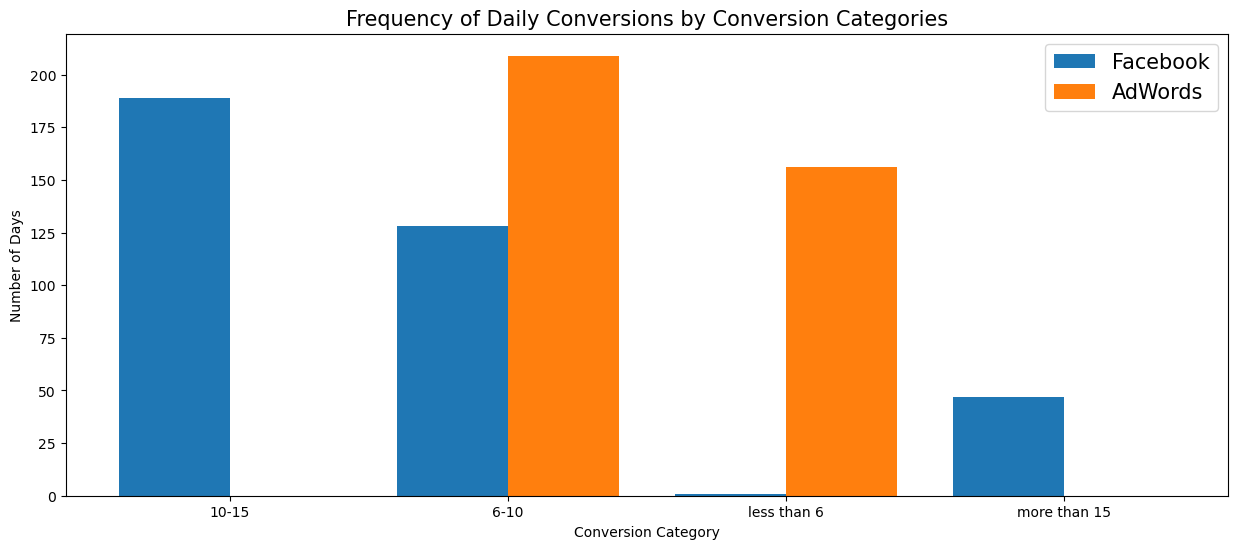

In [49]:
# Bar chart to compare conversion categories
plt.figure(figsize=(15, 6))
plt.bar(X_axis - 0.2, category_df['count_x'], width=0.4, label='Facebook')
plt.bar(X_axis + 0.2, category_df['count_y'], width=0.4, label='AdWords')
plt.xticks(X_axis, category_df['Category'])
plt.xlabel("Conversion Category")
plt.ylabel("Number of Days")
plt.title("Frequency of Daily Conversions by Conversion Categories", fontsize=15)
plt.legend(fontsize=15)
plt.show()

In [50]:
#The data suggests Facebook had more frequent higher conversion days than AdWords, which either had very low conversion rates (less than 6) or moderate ones (6 - 10).
#There is a significant variance in the number of high-conversion days between two different campaigns.
#The absence of any days with conversions between 10 - 15 and more than 15 in AdWords indicates a need to review what strategies were changed or what external factors could have influenced these numbers.

# Do more clicks on the ad really to more sales?

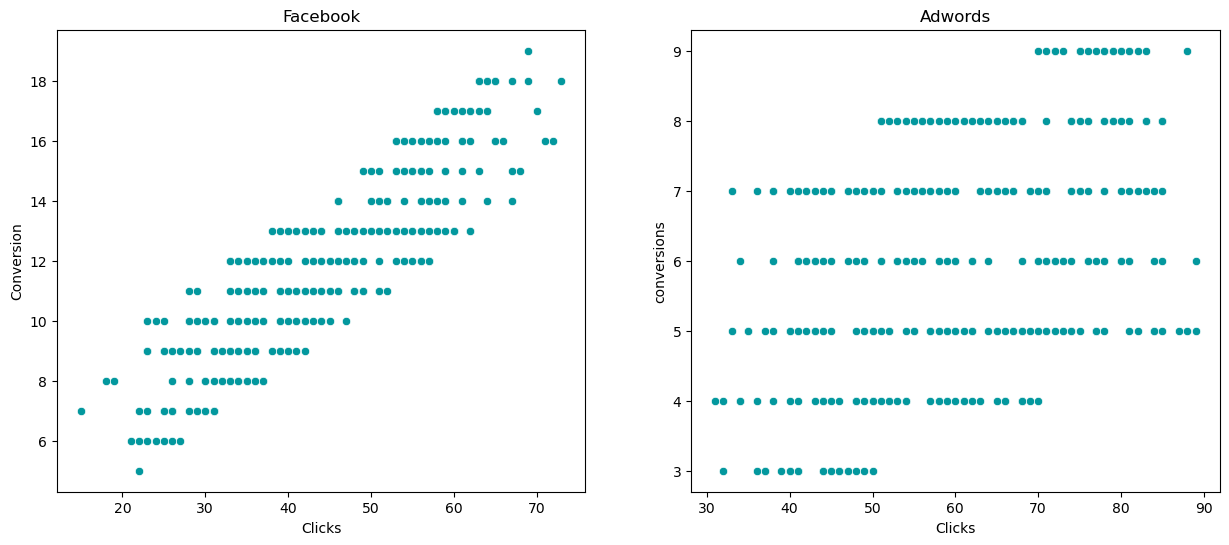

In [51]:
plt.figure(figsize = ( 15,6))
plt.subplot(1,2,1)
plt.title('Facebook')
sns.scatterplot(x = df['Facebook Ad Clicks'],y= df['Facebook Ad Conversions'],color = '#03989E')
plt.xlabel('Clicks')
plt.ylabel('Conversion')
plt.subplot(1,2,2)
plt.title('Adwords')
sns.scatterplot(x = df['AdWords Ad Clicks'],y= df['AdWords Ad Conversions'],color = '#03989E')
plt.xlabel('Clicks')
plt.ylabel('conversions')
plt.show()

In [52]:
facebook_corr = df[['Facebook Ad Clicks', 'Facebook Ad Conversions']].corr()
facebook_corr

,Facebook Ad Clicks,Facebook Ad Conversions
Facebook Ad Clicks,1.000000,0.873775
Facebook Ad Conversions,0.873775,1.000000


In [53]:
AdWords_corr = df[['AdWords Ad Clicks', 'AdWords Ad Conversions']].corr()
AdWords_corr

,AdWords Ad Clicks,AdWords Ad Conversions
AdWords Ad Clicks,1.000000,0.447993
AdWords Ad Conversions,0.447993,1.000000


In [54]:
print('Correlation Coeff \n ------------------------')
print('Facebook :',round(facebook_corr.values[0,1],2))
print('AdWords :',round(AdWords_corr.values[0,1],2))      

Correlation Coeff 
 ------------------------
Facebook : 0.87
AdWords : 0.45


In [55]:
#Facebook Ads (Correlation = 0.87)
# 1 There is a strong positive relationship between Facebook ad clicks and sales.
# 2 When Facebook ad clicks increase, sales also increase significantly, showing that Facebook ads are very effective.
# AdWords Ads (Correlation = 0.45)
# 1 There is a moderate positive relationship between AdWords ad clicks and sales.
# 2 AdWords ads help increase sales, but their impact is weaker than Facebook ads and may depend on other factors.

# Hypothesis Testing

In [56]:
print('Mean Conversion \n ---------')
print('Facebook :',round(df['Facebook Ad Conversions'].mean(),2))
print('AdWords :',round(df['AdWords Ad Conversions'].mean(),2))

Mean Conversion 
 ---------
Facebook : 11.74
AdWords : 5.98


In [57]:
t_test,p_value = st.ttest_ind(a = df['Facebook Ad Conversions'], b=df['AdWords Ad Conversions'], equal_var = False)
print('\nT statistic',t_test,'\np-value',p_value)

# Comparing the p value with the significance of 5% or 0.05
if p_value<0.05:
    print("\np-value is less than significance value, Reject the null hypothesis")
else:
    print("\np-value is greater than significance value, Accept the null hypothesis")


T statistic 32.88402060758184 
p-value 9.348918164530465e-134

p-value is less than significance value, Reject the null hypothesis


#Facebook ads perform significantly better than AdWords, with a much higher average number of conversions (11.74 vs 5.98), indicating stronger effectiveness in driving conversions.

#The very large T-statistic (32.88) and extremely small p-value (≈ 0) show a statistically significant difference between Facebook and AdWords conversions, strongly rejecting the null hypothesis.

#Business implication: Facebook should be prioritized for marketing investment, with increased budget and optimization efforts to maximize conversion performance.

# Regression Analysis

#What will happen when i do go with the Facebook Ad? How many Facebook ad conversion can i expect given a certain number of facebook ad clicks?

In [58]:
# independent variable
x= df[['Facebook Ad Clicks']]

#dependent variable
y= df[['Facebook Ad Conversions']]

# initializing and fitting Linear Regression model
reg_model = LinearRegression()
reg_model.fit(x,y)
prediction = reg_model.predict(x)

#model evaluation
r2 = r2_score(y,prediction)*100
mse = mean_squared_error(y, prediction)
print('Accuracy R2 score):', round(r2,2),'%')
print('Mean Squared Error:',round(mse,2))

Accuracy R2 score): 76.35 %
Mean Squared Error: 2.02


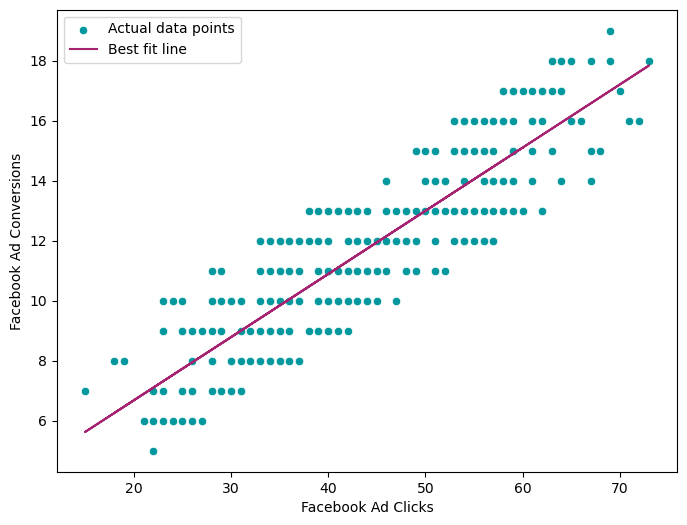

In [59]:
# Plotting linear regression
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Facebook Ad Clicks'], y=df['Facebook Ad Conversions'], color='#03989E', label='Actual data points')
plt.plot(df['Facebook Ad Clicks'], prediction, color='#A62372', label='Best fit line')
plt.legend()
plt.show()

In [60]:
print(f'For {50} Clicks, Expected Conversion : {round(reg_model.predict([[50]]).item(),2)}')
print(f'For {80} Clicks, Expected Conversion : {round(reg_model.predict([[80]]).item(),2)}')

For 50 Clicks, Expected Conversion : 13.0
For 80 Clicks, Expected Conversion : 19.31


#The model has a reasonably good predictive power, with an R2 score of 76.35%. This suggests that it can effectively predict Facebook ad conversions based on the number of Facebook ad clicks.

#With the insights provided by the Linear Regression model, businesses can make informed decisions about resource allocation, budget planning, and campaign optimization.

#For instance, knowing the expected number of Facebook ad conversions based on a certain number of Facebook ad clicks can help in setting realistic campaign goals, optimizing ad spend, and assessing the ROI of Facebook advertising efforts.